# 540.432 PK: Week 7 (Drug Administration)
Team Members: *Alejandro Soto Franco, Callie Jones, Daniel Labbe, and Samuel Bernstein*

This week, we are tasked with explaining the various mechanisms and routes of drug administration. We will show the differences in kinetics of each and add models of all the different drug administration routes to demonstrate, with examples, their effects on the pharmacokinetics.

## 7A: Given problem

We will answer the given problem: *A patient is given a 3 ml  IV  injection of a drug solution. The fluid contains 100 mg/ml and the drug is eliminated by zeroth order kinetics at a rate of 15 mg/hour.  The next day the patient is given an IV infusion of the same drug over a 6 hour period with an infusion rate of 100 ml/hour and a concentration of 500 mg/liter. Calculate the area under the curve for the two doses.  What do these areas say about the bioavailability of the drug given by IV infusion. Explain your conclusions.*



In [ ]:
## ASFPKD 7A: Answering the given problem

import numpy as np

# Define the elimination rate
elim_rate = 15  # mg/hour

# Define parameters for the first dose
volume_first_dose = 3  # ml
concentration_first_dose = 100  # mg/ml
dose_first = volume_first_dose * concentration_first_dose  # total mg

# Define the duration until the drug is completely eliminated for the first dose
duration_first_dose = dose_first / elim_rate  # hours

# Calculate the area under the curve for the first dose
AUC_first_dose = dose_first * duration_first_dose / 2  # The area of a triangle
print(f"AUC for the first dose (IV injection): {AUC_first_dose} mg*hr")

# Define parameters for the second dose
infusion_rate_second_dose = 100  # ml/hour
concentration_second_dose = 500 / 1000  # mg/ml, converting from mg/liter
dose_rate_second = infusion_rate_second_dose * concentration_second_dose  # mg/hour
duration_second_dose = 6  # hours

# Calculate the total dose for the second method
dose_second = dose_rate_second * duration_second_dose  # total mg

# Define the duration until the drug is completely eliminated for the second dose
duration_second_dose_total = dose_second / elim_rate  # hours

# Calculate the area under the curve for the second dose
# This is a trapezoid for the second dose (IV infusion)
AUC_second_dose = ((dose_rate_second + elim_rate) * duration_second_dose + (dose_rate_second - elim_rate) * (duration_second_dose_total - duration_second_dose)) / 2
print(f"AUC for the second dose (IV infusion): {AUC_second_dose} mg*hr")

# Calculate the difference in AUC
AUC_difference = AUC_second_dose - AUC_first_dose
print(f"Difference in AUC between the second and first dose: {AUC_difference} mg*hr")

# Conclusion
print("The single IV injection results in a higher AUC, indicating more overall exposure to the drug compared to the IV infusion.")

AUC for the first dose (IV injection): 3000.0 mg*hr
AUC for the second dose (IV infusion): 440.0 mg*hr
Difference in AUC between the second and first dose: -2560.0 mg*hr
The single IV injection results in a higher AUC, indicating more overall exposure to the drug compared to the IV infusion.


## 7B: Morphine modeling
Now, we'll make an example for morphine, which has its bioavailability values easily gathered from clinical pharmacology textbooks.

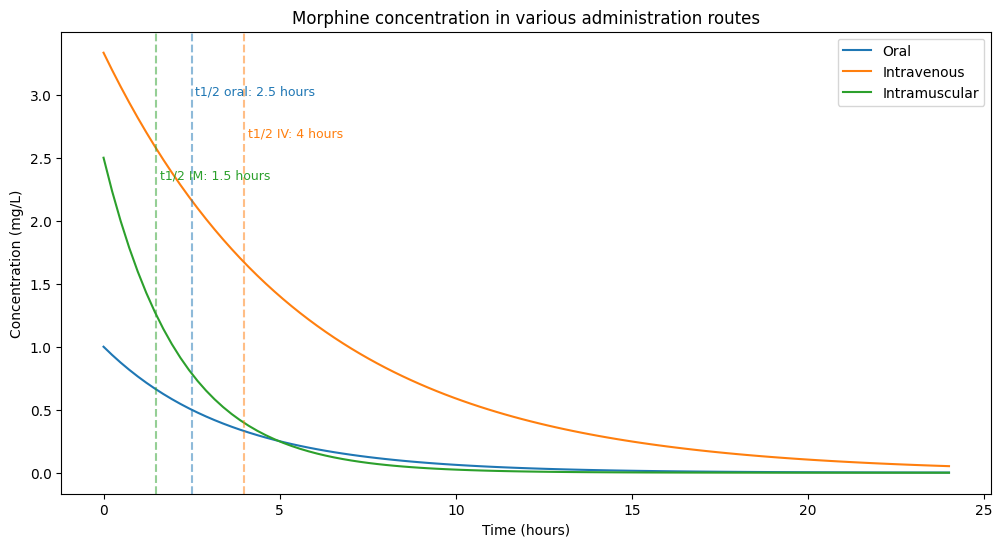

In [ ]:
## ASFPKD 7B: Morphine modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define PK parameters
Vd = 3  # Volume of distribution (L/kg), assuming a 70 kg individual
F_oral = 0.3
F_iv = 1.0
F_im = 0.75
D = 10  # Dosage (mg)

# Half-lives for each administration route (in hours)
t_half_oral = 2.5
t_half_iv = 4
t_half_im = 1.5

# Calculate kel for each administration route
kel_oral = 0.693 / t_half_oral
kel_iv = 0.693 / t_half_iv
kel_im = 0.693 / t_half_im

# Model function
def pk_model(y, t, kel, Vd):
    C = y  # Drug concentration
    dCdt = -kel * C
    return dCdt

# Time points (in hours)
t = np.linspace(0, 24, 100)

# Initial conditions
C0_oral = (D * F_oral) / Vd
C0_iv = (D * F_iv) / Vd
C0_im = (D * F_im) / Vd

# Solve ODE for each route of administration using odeint
solution_oral = odeint(pk_model, C0_oral, t, args=(kel_oral, Vd))
solution_iv = odeint(pk_model, C0_iv, t, args=(kel_iv, Vd))
solution_im = odeint(pk_model, C0_im, t, args=(kel_im, Vd))

# Create plot
plt.figure(figsize=(12, 6))
line_oral, = plt.plot(t, solution_oral, label='Oral')
line_iv, = plt.plot(t, solution_iv, label='Intravenous')
line_im, = plt.plot(t, solution_im, label='Intramuscular')

# Colors for each line
colors = {'Oral': line_oral.get_color(), 'Intravenous': line_iv.get_color(), 'Intramuscular': line_im.get_color()}

# Draw dashed lines for half-lives and add labels with actual values
y_max = max(max(solution_oral), max(solution_iv), max(solution_im))
label_info = [
    (t_half_oral, 't1/2 oral: {} hours'.format(t_half_oral), 'Oral', 0.9),
    (t_half_iv, 't1/2 IV: {} hours'.format(t_half_iv), 'Intravenous', 0.8),
    (t_half_im, 't1/2 IM: {} hours'.format(t_half_im), 'Intramuscular', 0.7)
]
for (half_life, label, line_label, y_pos_factor) in label_info:
    plt.axvline(x=half_life, color=colors[line_label], linestyle='--', alpha=0.5)
    plt.text(half_life + 0.1, y_max * y_pos_factor, label, fontsize=9, color=colors[line_label])

plt.title('Morphine concentration in various administration routes')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.legend()
plt.show()
